In [30]:
import pandas as pd

# Load the provided dataset
file_path = 'transport_ireland.csv'
ireland_transport_data = pd.read_csv(file_path)

# Display the first few 
ireland_transport_data.head()


,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0


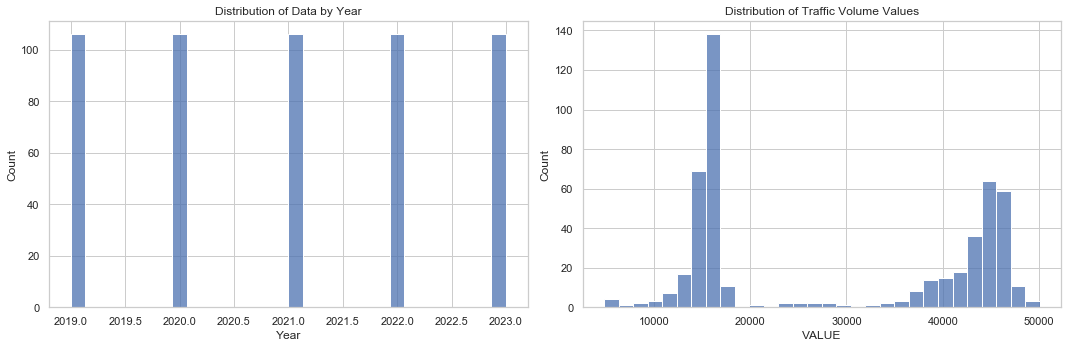

,TLIST(W1),Year,C03910V04662,C01198V01436,VALUE
count,530.00000,530.00000,530.000000,530.00000,496.000000
mean,2021.00000,2021.00000,15.000000,27.00000,28891.663306
std,1.41555,1.41555,5.004724,15.31151,14377.595591
min,2019.00000,2019.00000,10.000000,1.00000,4882.000000
25%,2020.00000,2020.00000,10.000000,14.00000,15726.500000
50%,2021.00000,2021.00000,15.000000,27.00000,17129.000000
75%,2022.00000,2022.00000,20.000000,40.00000,44526.250000
max,2023.00000,2023.00000,20.000000,53.00000,50049.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# Descriptive statistics of the dataset
descriptive_stats = ireland_transport_data.describe()

# Plotting distributions of numeric data
plt.figure(figsize=(15, 5))

# Histogram for the 'Year'
plt.subplot(1, 2, 1)
sns.histplot(ireland_transport_data['Year'], kde=False, bins=30)
plt.title('Distribution of Data by Year')

# Histogram for the 'VALUE'
plt.subplot(1, 2, 2)
sns.histplot(ireland_transport_data['VALUE'], kde=False, bins=30)
plt.title('Distribution of Traffic Volume Values')

plt.tight_layout()
plt.show()

descriptive_stats


In [3]:
# Check for missing values in the Irish dataset
ireland_missing_values = ireland_transport_data.isnull().sum()

# Check the data types and unique values for each column
ireland_data_types = ireland_transport_data.dtypes
ireland_unique_values = ireland_transport_data.nunique()

# Output the findings
print("Missing Values in Irish Dataset:\n", ireland_missing_values)
print("\nData Types in Irish Dataset:\n", ireland_data_types)
print("\nUnique Values in Irish Dataset:\n", ireland_unique_values)


Missing Values in Irish Dataset:
 STATISTIC                  0
Statistic Label            0
TLIST(W1)                  0
Year                       0
C03910V04662               0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64

Data Types in Irish Dataset:
 STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

Unique Values in Irish Dataset:
 STATISTIC                   1
Statistic Label             1
TLIST(W1)                   5
Year                        5
C03910V04662                2
Transport Traffic Site      2
C01198V01436               53
Weeks of the year          53
UNIT

In [4]:
# Impute missing values in the 'VALUE' column with the median
median_value = ireland_transport_data['VALUE'].median()
ireland_transport_data['VALUE'].fillna(median_value, inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = ireland_transport_data['VALUE'].isnull().sum()
print("Missing values after imputation in 'VALUE' column:", missing_values_after_imputation)


Missing values after imputation in 'VALUE' column: 0


In [5]:
# Load the two NYC Traffic Volume Counts datasets
file_path_2011_2012 = 'Traffic_Counts_2011-2012.csv'
file_path_2012_2013 = 'Traffic_Counts_2012-2013.csv'

nyc_traffic_2011_2012 = pd.read_csv(file_path_2011_2012)
nyc_traffic_2012_2013 = pd.read_csv(file_path_2012_2013)

# Display the first few rows of each dataset to understand their structure
nyc_traffic_2011_2012_head = nyc_traffic_2011_2012.head()
nyc_traffic_2012_2013_head = nyc_traffic_2012_2013.head()

(nyc_traffic_2011_2012_head, nyc_traffic_2012_2013_head)


(   ID  GIS ID  Roadway Name         From                To Direction  \
 0   1   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 1   2   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 2   3   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 3   4   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 4   5   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 
          Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  2:00-3:00PM  \
 0  01/09/2012             20           10           11  ...        104.0   
 1  01/10/2012             21           16            8  ...        102.0   
 2  01/11/2012             27           14            6  ...        115.0   
 3  01/12/2012             22            7            7  ...         71.0   
 4  01/13/2012             31           17            7  ...        113.0   
 
    3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  \
 0        105.0        14

In [6]:
import pandas as pd

# Concatenating the datasets
combined_nyc_traffic = pd.concat([nyc_traffic_2011_2012, nyc_traffic_2012_2013])

# Checking the combined dataset
combined_nyc_traffic_info = combined_nyc_traffic.info()
combined_nyc_traffic_head = combined_nyc_traffic.head()

(combined_nyc_traffic_info, combined_nyc_traffic_head)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 5944
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             9338 non-null   int64  
 1   GIS ID         3393 non-null   float64
 2   Roadway Name   9338 non-null   object 
 3   From           9338 non-null   object 
 4   To             9338 non-null   object 
 5   Direction      9338 non-null   object 
 6   Date           9338 non-null   object 
 7   12:00-1:00 AM  9338 non-null   int64  
 8   1:00-2:00AM    9338 non-null   int64  
 9   2:00-3:00AM    9338 non-null   float64
 10  3:00-4:00AM    9338 non-null   float64
 11  4:00-5:00AM    9338 non-null   int64  
 12  5:00-6:00AM    9338 non-null   float64
 13  6:00-7:00AM    9338 non-null   int64  
 14  7:00-8:00AM    9338 non-null   float64
 15  8:00-9:00AM    9338 non-null   float64
 16  9:00-10:00AM   9338 non-null   int64  
 17  10:00-11:00AM  9338 non-null   int64  
 18  11:00-12

(None,
    ID   GIS ID  Roadway Name         From                To Direction  \
 0   1  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 1   2  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 2   3  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 3   4  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 4   5  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 
          Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  3:00-4:00PM  \
 0  01/09/2012             20           10         11.0  ...        105.0   
 1  01/10/2012             21           16          8.0  ...         98.0   
 2  01/11/2012             27           14          6.0  ...        115.0   
 3  01/12/2012             22            7          7.0  ...        127.0   
 4  01/13/2012             31           17          7.0  ...        126.0   
 
    4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  8:00-9:00PM  \
 0        14

In [7]:
# Convert 'Date' column to datetime format
combined_nyc_traffic['Date'] = pd.to_datetime(combined_nyc_traffic['Date'])

# Handling missing values
# For numeric columns like 'GIS ID' and 'Segment ID', you can fill missing values with a placeholder like 0 or a statistical measure like the mean.
combined_nyc_traffic['GIS ID'].fillna(0, inplace=True)
combined_nyc_traffic['Segment ID'].fillna(0, inplace=True)

# Verify changes
combined_nyc_traffic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 5944
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             9338 non-null   int64         
 1   GIS ID         9338 non-null   float64       
 2   Roadway Name   9338 non-null   object        
 3   From           9338 non-null   object        
 4   To             9338 non-null   object        
 5   Direction      9338 non-null   object        
 6   Date           9338 non-null   datetime64[ns]
 7   12:00-1:00 AM  9338 non-null   int64         
 8   1:00-2:00AM    9338 non-null   int64         
 9   2:00-3:00AM    9338 non-null   float64       
 10  3:00-4:00AM    9338 non-null   float64       
 11  4:00-5:00AM    9338 non-null   int64         
 12  5:00-6:00AM    9338 non-null   float64       
 13  6:00-7:00AM    9338 non-null   int64         
 14  7:00-8:00AM    9338 non-null   float64       
 15  8:00-9:00AM    9338 n

In [8]:
# Columns representing hourly traffic counts
hourly_columns = ['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM', 
                  '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', 
                  '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', 
                  '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', 
                  '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM']

# Adding a new column for total daily traffic volume
combined_nyc_traffic['Total Daily Traffic'] = combined_nyc_traffic[hourly_columns].sum(axis=1)


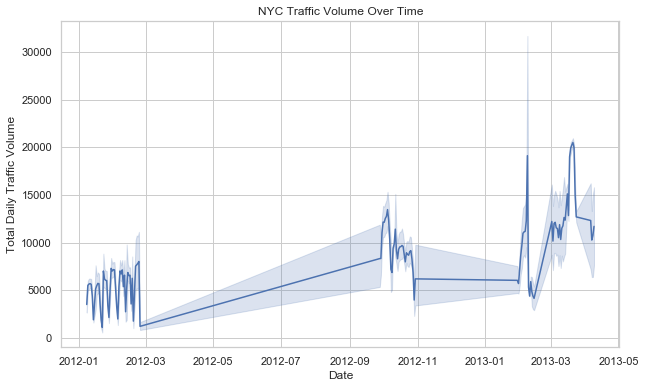

In [9]:
# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Daily Traffic', data=combined_nyc_traffic)
plt.title('NYC Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Traffic Volume')
plt.show()


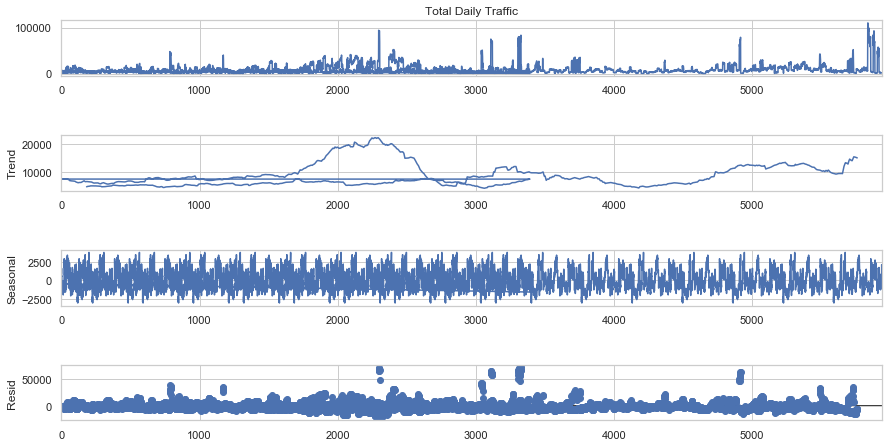

In [10]:
import statsmodels.api as sm

# Decompose the time series to find trends and seasonality
decomposition = sm.tsa.seasonal_decompose(combined_nyc_traffic['Total Daily Traffic'], model='additive', period=365)

# Plotting the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


<Figure size 864x576 with 0 Axes>

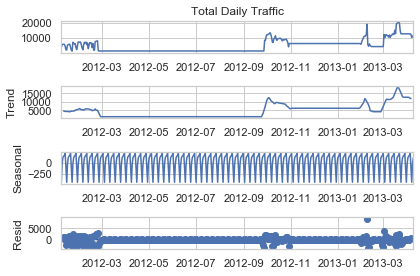

In [11]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Check if 'Date' is already the index
if 'Date' not in combined_nyc_traffic.columns:
    # If 'Date' is not a column, it might already be the index
    daily_nyc_traffic = combined_nyc_traffic['Total Daily Traffic'].resample('D').mean().fillna(method='ffill')
else:
    # If 'Date' is a column, set it as the index and then resample
    combined_nyc_traffic['Date'] = pd.to_datetime(combined_nyc_traffic['Date'])
    combined_nyc_traffic.set_index('Date', inplace=True)
    daily_nyc_traffic = combined_nyc_traffic['Total Daily Traffic'].resample('D').mean().fillna(method='ffill')

# Decompose the time series
decomposition_nyc = sm.tsa.seasonal_decompose(daily_nyc_traffic, model='additive')

# Plot the decomposed time series components
plt.figure(figsize=(12, 8))
decomposition_nyc.plot()
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_test_nyc = adfuller(combined_nyc_traffic['Total Daily Traffic'].dropna())

print('ADF Statistic for NYC: %f' % adf_test_nyc[0])
print('p-value for NYC: %f' % adf_test_nyc[1])
print('Critical Values for NYC:')
for key, value in adf_test_nyc[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic for NYC: -9.123569
p-value for NYC: 0.000000
Critical Values for NYC:
	1%: -3.431
	5%: -2.862
	10%: -2.567


                                SARIMAX Results                                
Dep. Variable:     Total Daily Traffic   No. Observations:                  458
Model:                  ARIMA(1, 0, 1)   Log Likelihood               -3928.668
Date:                 Sun, 14 Jan 2024   AIC                           7865.335
Time:                         02:15:32   BIC                           7881.843
Sample:                     01-08-2012   HQIC                          7871.837
                          - 04-09-2013                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4583.9218   1916.409      2.392      0.017     827.830    8340.014
ar.L1          0.9619      0.013     74.670      0.000       0.937       0.987
ma.L1         -0.1347      0.027     -5.027 

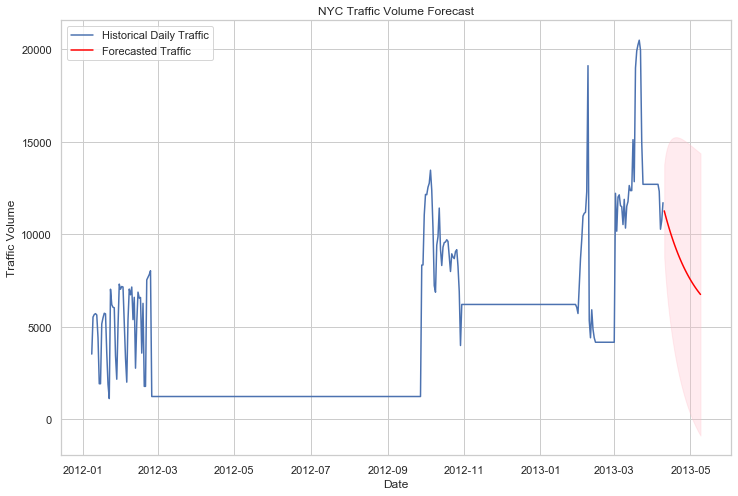

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model
# Note: The order (p,d,q) needs to be chosen based on model selection processes like AIC
# Here, we use placeholder values (1,0,1), which should be determined appropriately

arima_model = ARIMA(daily_nyc_traffic, order=(1, 0, 1))
arima_result = arima_model.fit()

# Print out the summary of the model
print(arima_result.summary())

# Forecast future traffic volumes
forecast = arima_result.get_forecast(steps=30)  # Forecasting the next 30 days as an example
forecast_df = forecast.summary_frame()

# Plot the forecast alongside historical data
plt.figure(figsize=(12, 8))
plt.plot(daily_nyc_traffic, label='Historical Daily Traffic')
plt.plot(forecast_df['mean'], label='Forecasted Traffic', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('NYC Traffic Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


### Ireland


In [56]:
# Convert 'Year' and 'Weeks of the year' to datetime, assuming 'Weeks of the year' is the week number
ireland_transport_data['Date'] = ireland_transport_data.apply(
    lambda x: pd.to_datetime(f"{x['Year']} {x['C01198V01436']} 1", format="%Y %W %w"), 
    axis=1
)

# Set 'Date' as the index
ireland_transport_data.set_index('Date', inplace=True)

# Sum up the weekly data if there are multiple entries per week
weekly_ireland_traffic = ireland_transport_data['VALUE'].resample('W').sum()


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~\anaconda3\lib\site-packages\plotly\express\_chart_types.py in line(
    data_frame=             ID   GIS ID  Roadway Name          ...1505.0       110057.0  

[9338 rows x 33 columns],
    x='Date',
    y='Total Daily Traffic',
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    

<Figure size 864x576 with 0 Axes>

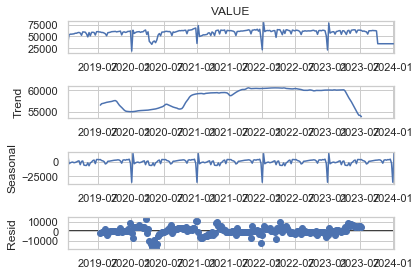

In [15]:
# Decompose the weekly time series
decomposition_ireland = sm.tsa.seasonal_decompose(weekly_ireland_traffic, model='additive')

# Plot the decomposed time series components
plt.figure(figsize=(12, 8))
decomposition_ireland.plot()
plt.show()


In [16]:
# Perform Augmented Dickey-Fuller test
adf_test_ireland = adfuller(weekly_ireland_traffic.dropna())

print('ADF Statistic for Ireland: %f' % adf_test_ireland[0])
print('p-value for Ireland: %f' % adf_test_ireland[1])
print('Critical Values for Ireland:')
for key, value in adf_test_ireland[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic for Ireland: -3.910789
p-value for Ireland: 0.001957
Critical Values for Ireland:
	1%: -3.456
	5%: -2.873
	10%: -2.573


                               SARIMAX Results                                
Dep. Variable:                  VALUE   No. Observations:                  261
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2693.616
Date:                Sun, 14 Jan 2024   AIC                           5395.231
Time:                        02:15:36   BIC                           5409.489
Sample:                    01-13-2019   HQIC                          5400.962
                         - 01-07-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.714e+04   2344.141     24.374      0.000    5.25e+04    6.17e+04
ar.L1          0.9303      0.032     29.282      0.000       0.868       0.993
ma.L1         -0.6273      0.039    -16.289      0.0

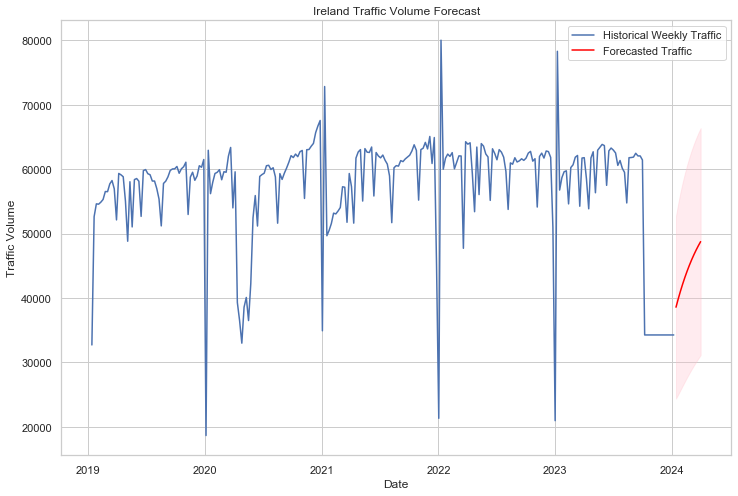

In [17]:
# Fit an ARIMA model to the Ireland data
# The order (p,d,q) needs to be determined based on model diagnostics
# Here, a placeholder order (1,0,1) is used; adjust this based on your analysis

arima_model_ireland = ARIMA(weekly_ireland_traffic, order=(1, 0, 1))
arima_result_ireland = arima_model_ireland.fit()

# Print out the summary of the model
print(arima_result_ireland.summary())

# Forecast future traffic volumes for Ireland
forecast_ireland = arima_result_ireland.get_forecast(steps=12)  # Forecasting the next 12 weeks as an example
forecast_ireland_df = forecast_ireland.summary_frame()

# Plot the forecast alongside historical data
plt.figure(figsize=(12, 8))
plt.plot(weekly_ireland_traffic, label='Historical Weekly Traffic')
plt.plot(forecast_ireland_df['mean'], label='Forecasted Traffic', color='red')
plt.fill_between(forecast_ireland_df.index, forecast_ireland_df['mean_ci_lower'], forecast_ireland_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Ireland Traffic Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


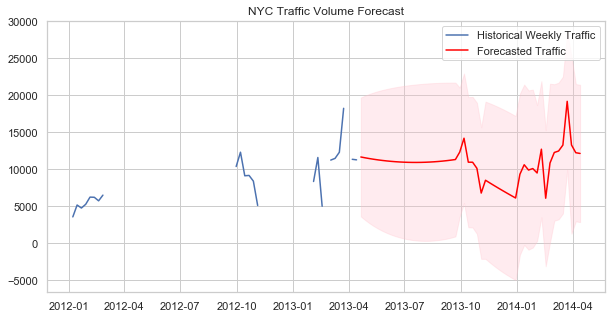

In [19]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


# Preprocessing the data
# Ensure that the data is at a weekly granularity if it's not already
nyc_traffic_data = combined_nyc_traffic.resample('W').mean()


# Align the NYC data time period with the Ireland data time period
common_start = max(nyc_traffic_data.index.min(), ireland_transport_data.index.min())
common_end = min(nyc_traffic_data.index.max(), ireland_transport_data.index.max())

nyc_traffic_data = nyc_traffic_data[(nyc_traffic_data.index >= common_start) & (nyc_traffic_data.index <= common_end)]
ireland_transport_data = ireland_transport_data[(ireland_transport_data.index >= common_start) & (ireland_transport_data.index <= common_end)]

# SARIMAX Model Fit for NYC data
# Note: We'll need to choose order and seasonal_order based on the dataset's characteristics
sarimax_model_nyc = SARIMAX(nyc_traffic_data['Total Daily Traffic'], order=(1, 0, 1), seasonal_order=(1, 1, 1, 52))
sarimax_results_nyc = sarimax_model_nyc.fit()

# Forecasting
nyc_forecast = sarimax_results_nyc.get_forecast(steps=52)
forecast_conf_int = nyc_forecast.conf_int()

# Plot the results
plt.figure(figsize=(10,5))
plt.plot(nyc_traffic_data['Total Daily Traffic'], label='Historical Weekly Traffic')
plt.plot(nyc_forecast.predicted_mean, label='Forecasted Traffic', color='red')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('NYC Traffic Volume Forecast')
plt.legend()
plt.show()




In [25]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming 'sarimax_results_nyc.fittedvalues' and 'nyc_traffic_data' are already defined

# Ensure the 'Total Daily Traffic' column doesn't have NaN values
nyc_traffic_data['Total Daily Traffic'] = nyc_traffic_data['Total Daily Traffic'].replace([np.inf, -np.inf], np.nan).dropna()

# Find the overlap between the model's fitted values and the observed data
overlap_index = nyc_traffic_data.index.intersection(sarimax_results_nyc.fittedvalues.index)

# Subset the observed data and the fitted values to the overlapping period
observed_data = nyc_traffic_data.loc[overlap_index, 'Total Daily Traffic']
fitted_data = sarimax_results_nyc.fittedvalues.loc[overlap_index]

# Drop any rows where either observed_data or fitted_data is NaN
valid_indices = observed_data.notna() & fitted_data.notna()
observed_data = observed_data[valid_indices]
fitted_data = fitted_data[valid_indices]

# Now calculate RMSE and MAE
rmse = mean_squared_error(observed_data, fitted_data, squared=False)
mae = mean_absolute_error(observed_data, fitted_data)

print(f'NYC RMSE: {rmse}')
print(f'NYC MAE: {mae}')


NYC RMSE: 3271.42160496401
NYC MAE: 2546.284331402285


In [32]:
ireland_transport_data.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0


C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', Valu

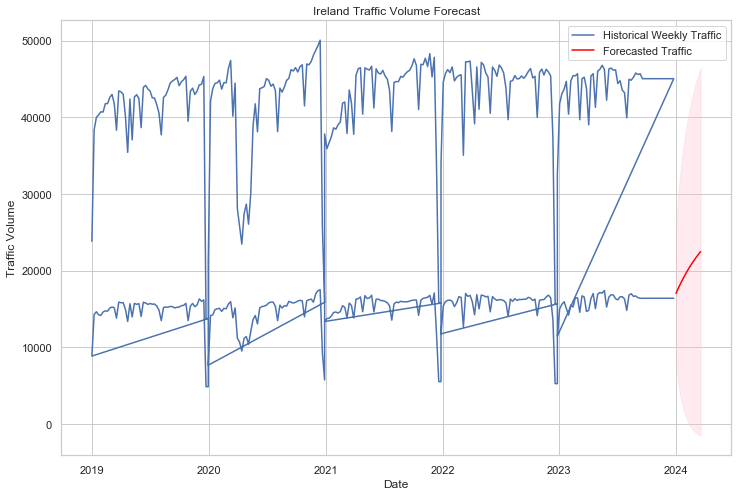

In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Assuming ireland_transport_data is already loaded and is a pandas DataFrame

# Function to convert year and week number to a date
def year_week_to_date(year, week):
    first_day_of_year = datetime(year, 1, 1)
    day_of_week = first_day_of_year.weekday()
    # Adjusting to the start of the week (Monday)
    if day_of_week != 0:
        first_day_of_year -= timedelta(days=day_of_week)
    return first_day_of_year + timedelta(weeks=week - 1)

# Extract and format week number from 'Weeks of the year' column
ireland_transport_data['Week_Number'] = ireland_transport_data['Weeks of the year'].str.extract('(\d+)').astype(int)

# Apply the function to each row to calculate the date
ireland_transport_data['Date'] = ireland_transport_data.apply(lambda row: year_week_to_date(row['Year'], row['Week_Number']), axis=1)

# Now that 'Date' is correctly calculated, we can set it as the index
ireland_transport_data.set_index('Date', inplace=True)

# Selecting the 'VALUE' column for analysis
weekly_ireland_traffic = ireland_transport_data['VALUE']

# Handle missing values if necessary
weekly_ireland_traffic = weekly_ireland_traffic.fillna(method='ffill')

# Fit the ARIMA model
arima_model_ireland = ARIMA(weekly_ireland_traffic, order=(1, 0, 1))
arima_result_ireland = arima_model_ireland.fit()

# Generate a date range for the forecast starting the week after the last historical data
last_hist_date = weekly_ireland_traffic.index[-1]
start_forecast_date = last_hist_date + timedelta(days=7 - last_hist_date.weekday())  # start at the next Monday
forecast_dates = pd.date_range(start=start_forecast_date, periods=12, freq='W-MON')

# Forecast the future values
forecast_ireland = arima_result_ireland.get_forecast(steps=12)
forecast_ireland_df = forecast_ireland.summary_frame()

# Ensure the forecast dates are aligned
forecast_ireland_df.index = forecast_dates

# Plotting the historical and forecasted traffic volumes
plt.figure(figsize=(12, 8))
plt.plot(weekly_ireland_traffic.index, weekly_ireland_traffic, label='Historical Weekly Traffic')
plt.plot(forecast_ireland_df.index, forecast_ireland_df['mean'], label='Forecasted Traffic', color='red')
plt.fill_between(forecast_ireland_df.index, forecast_ireland_df['mean_ci_lower'], forecast_ireland_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Ireland Traffic Volume Forecast')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


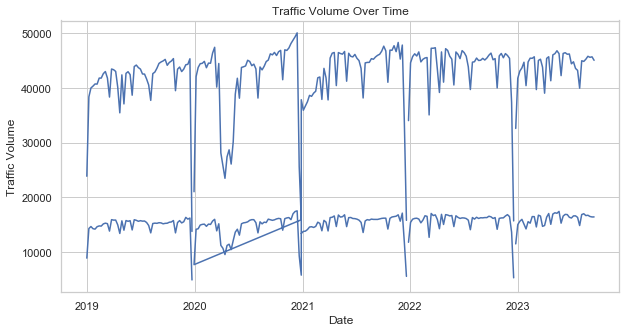

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ireland_transport_data is loaded with 'Date' as a DatetimeIndex
# Check the index type
print(type(ireland_transport_data.index))  # should be <class 'pandas.core.indexes.datetimes.DatetimeIndex'>

# Plot the 'VALUE' column
plt.figure(figsize=(10, 5))
plt.plot(ireland_transport_data.index, ireland_transport_data['VALUE'])
plt.title('Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.show()


In [38]:
# Calculate RMSE
rmse_ireland = mean_squared_error(weekly_ireland_traffic, arima_result_ireland.fittedvalues, squared=False)
print(f'Ireland RMSE: {rmse_ireland}')

# Calculate MAE
mae_ireland = mean_absolute_error(weekly_ireland_traffic, arima_result_ireland.fittedvalues)
print(f'Ireland MAE: {mae_ireland}')


Ireland RMSE: 4434.983348277097
Ireland MAE: 2213.821501714122


In [39]:
ireland_transport_data.columns

Index(['STATISTIC', 'Statistic Label', 'TLIST(W1)', 'Year', 'C03910V04662',
       'Transport Traffic Site', 'C01198V01436', 'Weeks of the year', 'UNIT',
       'VALUE', 'Week_Number'],
      dtype='object')

In [40]:
combined_nyc_traffic.columns

Index(['ID', 'GIS ID', 'Roadway Name', 'From', 'To', 'Direction',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'Segment ID', 'Total Daily Traffic'],
      dtype='object')

In [41]:
from scipy import stats
import numpy as np
import pandas as pd

# Assuming combined_nyc_traffic is a pandas DataFrame with the NYC data already loaded

# Calculate the sample mean and standard deviation for 'Total Daily Traffic'
nyc_mean = combined_nyc_traffic['Total Daily Traffic'].mean()
nyc_std = combined_nyc_traffic['Total Daily Traffic'].std()
nyc_n = combined_nyc_traffic['Total Daily Traffic'].count()

# Calculate the t-critical value for 95% confidence interval
t_critical = stats.t.ppf(q=0.975, df=nyc_n - 1)  # Two-tailed 95% CI, q is 1 - (alpha/2)

# Calculate the margin of error
margin_error = t_critical * (nyc_std / np.sqrt(nyc_n))

# Calculate the confidence interval
confidence_interval = (nyc_mean - margin_error, nyc_mean + margin_error)

print(f"The 95% confidence interval for the mean daily traffic volume in NYC is: {confidence_interval}")


The 95% confidence interval for the mean daily traffic volume in NYC is: (8175.779713855775, 8567.03419490413)


In [42]:
# Conduct a t-test to compare the means of traffic volumes between NYC and Ireland
from scipy.stats import ttest_ind

# Assuming ireland_transport_data and combined_nyc_traffic are loaded with 'VALUE' and 'Total Daily Traffic' as traffic volume columns respectively
t_stat, p_val = ttest_ind(ireland_transport_data['VALUE'], combined_nyc_traffic['Total Daily Traffic'], equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

# If the P-value is less than 0.05, we reject the null hypothesis

T-statistic: nan, P-value: nan


C:\Users\Lenovo\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [43]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming 'ireland_transport_data' and 'combined_nyc_traffic' are Pandas DataFrames and have a DateTime index

# Resample both series to a common frequency if needed, for example, weekly averages
weekly_ireland = ireland_transport_data['VALUE'].resample('W').mean()
weekly_nyc = combined_nyc_traffic['Total Daily Traffic'].resample('W').mean()

# Align the data to the same date range
start_date = max(weekly_ireland.index.min(), weekly_nyc.index.min())
end_date = min(weekly_ireland.index.max(), weekly_nyc.index.max())
aligned_ireland = weekly_ireland[start_date:end_date]
aligned_nyc = weekly_nyc[start_date:end_date]

# Fill missing values if necessary, here we forward-fill to the next valid observation
aligned_ireland = aligned_ireland.fillna(method='ffill')
aligned_nyc = aligned_nyc.fillna(method='ffill')

# Check if both series have at least two data points
if len(aligned_ireland) > 1 and len(aligned_nyc) > 1:
    # Calculate the Pearson correlation coefficient
    pearson_corr, p_val = pearsonr(aligned_ireland, aligned_nyc)
    print(f"Pearson Correlation Coefficient: {pearson_corr}, P-value: {p_val}")
else:
    print(f"Insufficient data points for correlation calculation. Ireland data points: {len(aligned_ireland)}, NYC data points: {len(aligned_nyc)}")


Insufficient data points for correlation calculation. Ireland data points: 0, NYC data points: 0


                ID         GIS ID  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  \
count  9338.000000    9338.000000    9338.000000  9338.000000  9338.000000   
mean    740.336368   25336.226280     207.686121   151.141893   118.847736   
std     937.617322   41207.154759     332.420403   267.593728   234.753023   
min       1.000000       0.000000       0.000000     0.000000     0.000000   
25%     149.000000       0.000000      55.000000    34.000000    23.000000   
50%     288.000000       0.000000     106.000000    68.000000    49.000000   
75%    1058.750000   51667.000000     207.000000   143.000000   107.000000   
max    3393.000000  194613.000000    4463.000000  4489.000000  4818.000000   

       3:00-4:00AM  4:00-5:00AM  5:00-6:00AM  6:00-7:00AM  7:00-8:00AM  ...  \
count  9338.000000  9338.000000  9338.000000  9338.000000  9338.000000  ...   
mean    103.655903   112.661812   150.554669   263.991112   419.355661  ...   
std     211.022904   208.252481   267.719134   422.222830   

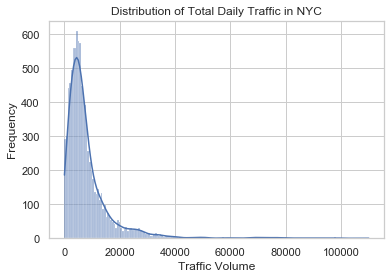

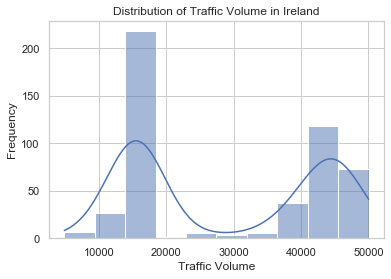

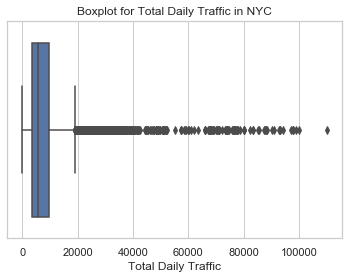

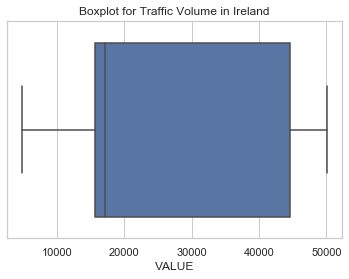

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
nyc_data = combined_nyc_traffic
ireland_data = ireland_transport_data

# Describe the datasets
print(nyc_data.describe())
print(ireland_data.describe())

# Check for missing values
print(nyc_data.isnull().sum())
print(ireland_data.isnull().sum())

# Visualize the distribution of key metrics
sns.histplot(nyc_data['Total Daily Traffic'], kde=True)
plt.title('Distribution of Total Daily Traffic in NYC')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

sns.histplot(ireland_data['VALUE'], kde=True)
plt.title('Distribution of Traffic Volume in Ireland')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

# Boxplot to identify outliers
sns.boxplot(x=nyc_data['Total Daily Traffic'])
plt.title('Boxplot for Total Daily Traffic in NYC')
plt.show()

sns.boxplot(x=ireland_data['VALUE'])
plt.title('Boxplot for Traffic Volume in Ireland')
plt.show()


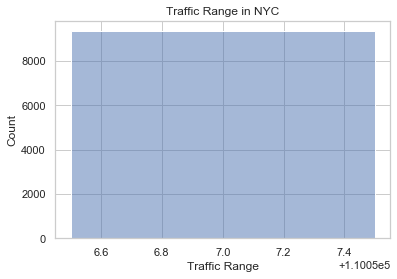

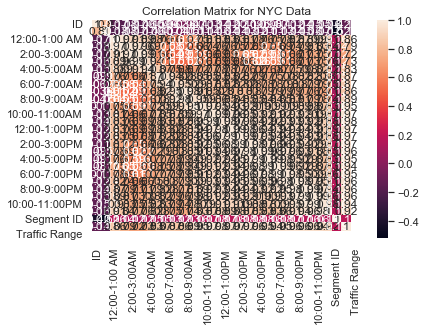

In [52]:
# Handling missing values
nyc_data.fillna(nyc_data.mean(), inplace=True)
ireland_data.fillna(ireland_data.mean(), inplace=True)

# Feature engineering: example of creating a new feature
nyc_data['Traffic Range'] = nyc_data['Total Daily Traffic'].max() - nyc_data['Total Daily Traffic'].min()
ireland_data['Traffic Range'] = ireland_data['VALUE'].max() - ireland_data['VALUE'].min()

# Visualize the cleaned data
sns.histplot(nyc_data['Traffic Range'], kde=True)
plt.title('Traffic Range in NYC')
plt.show()

# Visualize correlation matrix
correlation_matrix_nyc = nyc_data.corr()
sns.heatmap(correlation_matrix_nyc, annot=True)
plt.title('Correlation Matrix for NYC Data')
plt.show()


In [54]:
pip install dash plotly


You should consider upgrading via the 'C:\Users\Lenovo\anaconda3\python.exe -m pip install --upgrade pip' command.


In [55]:
# Dash app (simplified example)
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Assuming your cleaned and processed data is in 'nyc_data' and 'ireland_data' DataFrames

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='traffic-volume-graph'),
    html.Label('Select City:'),
    dcc.Dropdown(
        id='city-dropdown',
        options=[
            {'label': 'NYC', 'value': 'NYC'},
            {'label': 'Ireland', 'value': 'IRE'},
        ],
        value='NYC'
    )
])

@app.callback(
    Output('traffic-volume-graph', 'figure'),
    [Input('city-dropdown', 'value')]
)
def update_graph(selected_city):
    if selected_city == 'NYC':
        fig = px.line(nyc_data, x='Date', y='Total Daily Traffic', title='Traffic Volume Over Time in NYC')
    else:
        fig = px.line(ireland_data, x='Date', y='VALUE', title='Traffic Volume Over Time in Ireland')
    
    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
~\anaconda3\lib\site-packages\plotly\express\_chart_types.py in line(
    data_frame=             ID   GIS ID  Roadway Name          ...1505.0       110057.0  

[9338 rows x 33 columns],
    x='Date',
    y='Total Daily Traffic',
    line_group=None,
    color=None,
    line_dash=None,
    symbol=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    text=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    error_x=None,
    error_x_minus=None,
    error_y=None,
    error_y_minus=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    orientation=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    line_dash_sequence=None,
    line_dash_map=None,
    symbol_sequence=None,
    